In [1]:
cd drive/My\ Drive/ML_hw

/content/drive/My Drive/ML_hw


In [2]:
pwd

'/content/drive/My Drive/ML_hw'

In [4]:
import numpy as np
import copy
import random
import matplotlib.pyplot as plt

np.random.seed(0)

In [363]:
class NeuralNetwork:
    def __init__(self):

        self.w = np.array([0., 0.])
        self.b = 0

    def train(self, data, all_y_true, batchsize=4, epochs=10, lr=0.00001):
        n = len(data)
        y_preds = self.forward(data, self.w, self.b)
        lossVal = mse_loss(all_y_true, y_preds)
        data = copy.deepcopy(data)
        history = [lossVal]

        for epoch in range(1, epochs + 1):
            # print(all_y_true)
            dataset = list(zip(data, all_y_true))
            # print(dataset)
            random.shuffle(dataset)
            # print(dataset)

            n_batch = np.ceil(n / batchsize)
            for index in range(int(n_batch)):
                l_bound = index * batchsize
                r_bound = (index + 1) * batchsize

                if r_bound > n:
                    r_bound = n
                    l_bound = r_bound - batchsize

                x_batch = np.zeros((r_bound - l_bound, *data.shape[1:]))
                y_batch = np.zeros((r_bound - l_bound, *all_y_true.shape[1:]))

                instance_count = 0
                for x, y in dataset[l_bound: r_bound]:
                    x_batch[instance_count] = x
                    y_batch[instance_count] = y
                    instance_count += 1
                # print(x_batch.shape, y_batch.shape)
                j_diff_w, j_diff_b = self.grad(x_batch, y_batch)

                self.w -= lr * j_diff_w
                self.b -= lr * j_diff_b

                # self.sgd(x_batch, y_batch, self.wb, lr=lr, loss=loss)

            if epoch % 10 == 0:
                y_preds = self.forward(data, self.w, self.b)
                lossVal = mse_loss(all_y_true, y_preds)
                print("Epoch %d \t loss: %.6f " % (epoch, lossVal))
                history.append(lossVal)
        return self.w, self.b, history

    # def _sigmoid(x):
    #     return 1 / (1 + np.exp(-1 * x))

    def forward(self, x, w, b):
        """
        前向传播
        """

        # sigmoid
        return 1 / (1 + np.exp(-1 * (np.sum(x * w, axis=1) + b)))
        # return self._sigmoid(np.sum(x * w, axis=1) + b)


    def grad(self, x, y_true, d=1e-6):
        """
        求偏导
        """
        j_diff_w, j_diff_b = np.zeros(self.w.shape), 0.

        w, b = self.w, self.b
        
        # 求关于w的偏导
        o = self.forward(x, self.w, self.b)
        # print(y_true.shape, o.shape)
        loss = self._mse_loss(np.squeeze(y_true), np.squeeze(o))
        

        for i, w_i in enumerate(self.w):
            w[i] += d
            o_ = self.forward(x, w, self.b)
            loss_ = self._mse_loss(np.squeeze(y_true), np.squeeze(o_))
            j_diff_w[i] = (loss_ - loss) / d
            w[i] -= d
        
        b += d
        o_ = self.forward(x, self.w, b)
        loss_ = self._mse_loss(np.squeeze(y_true), np.squeeze(o_))
        j_diff_b = (loss_ - loss) / d


        return j_diff_w, j_diff_b


    def _mse_loss(self, y_true, y_pred):
        return ((y_true - y_pred) ** 2).mean()

    def sigmoid(x):
        return 1 / (1 + np.exp(-1 * x))
    
    def sigmoid_diff(x):
        return sigmoid(x) * (1 - sigmoid(x))


In [364]:
sigma = 0.01

x_n1 = np.random.multivariate_normal([0., 0.], sigma * cov, num)
x_n2 = np.random.multivariate_normal([0., 1.], sigma * cov, num)
x_n3 = np.random.multivariate_normal([1., 0.], sigma * cov, num)
x_n = np.vstack((x_n1, x_n2, x_n3))
x_n = x_n[np.random.choice(range(num), num)]
print(x_n.shape)

x = np.vstack((x_p, x_n))
y = np.hstack((np.ones(num), np.zeros(num)))

(300, 2)


In [365]:
def gen_n_data(sigma, num):
    cov = np.array([[1., 0.], [0., 1.]])

    x_p = np.random.multivariate_normal([5., 5.], cov, num)
     
    x_n1 = np.random.multivariate_normal([0., 0.], sigma * cov, num//3)
    x_n2 = np.random.multivariate_normal([0., 5.], sigma * cov, num//3)
    x_n3 = np.random.multivariate_normal([5., 0.], sigma * cov, num//3)
    x_n = np.vstack((x_n1, x_n2, x_n3))
    
    x = np.vstack((x_p, x_n))
    y = np.hstack((np.ones(num), np.zeros(num)))

    return x, y

Epoch 10 	 loss: 0.183568 
Epoch 20 	 loss: 0.162341 
Epoch 30 	 loss: 0.145712 
Epoch 40 	 loss: 0.132545 
Epoch 50 	 loss: 0.121992 
Epoch 60 	 loss: 0.113290 
Epoch 70 	 loss: 0.106024 
Epoch 80 	 loss: 0.099853 
Epoch 90 	 loss: 0.094510 
Epoch 100 	 loss: 0.089813 
Epoch 10 	 loss: 0.184837 
Epoch 20 	 loss: 0.164361 
Epoch 30 	 loss: 0.148437 
Epoch 40 	 loss: 0.135970 
Epoch 50 	 loss: 0.125841 
Epoch 60 	 loss: 0.117601 
Epoch 70 	 loss: 0.110769 
Epoch 80 	 loss: 0.105091 
Epoch 90 	 loss: 0.100083 
Epoch 100 	 loss: 0.095729 
Epoch 10 	 loss: 0.187343 
Epoch 20 	 loss: 0.167993 
Epoch 30 	 loss: 0.153043 
Epoch 40 	 loss: 0.141359 
Epoch 50 	 loss: 0.132082 
Epoch 60 	 loss: 0.124578 
Epoch 70 	 loss: 0.118344 
Epoch 80 	 loss: 0.113137 
Epoch 90 	 loss: 0.108686 
Epoch 100 	 loss: 0.104861 
Epoch 10 	 loss: 0.184965 
Epoch 20 	 loss: 0.166248 
Epoch 30 	 loss: 0.152162 
Epoch 40 	 loss: 0.141378 
Epoch 50 	 loss: 0.133020 
Epoch 60 	 loss: 0.126170 
Epoch 70 	 loss: 0.120658

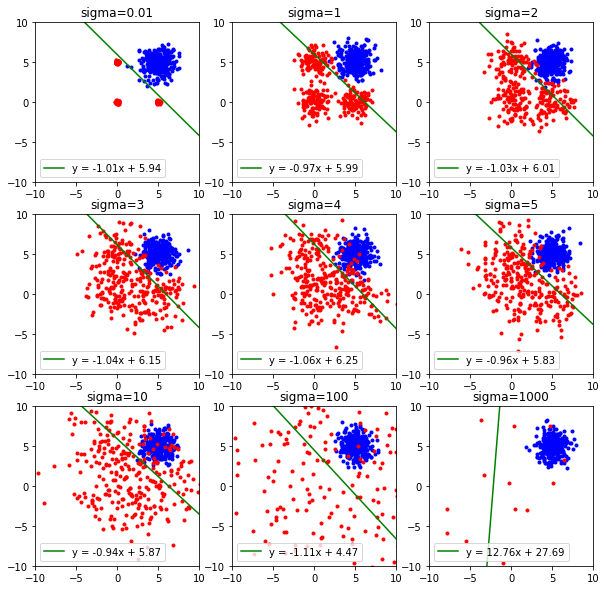

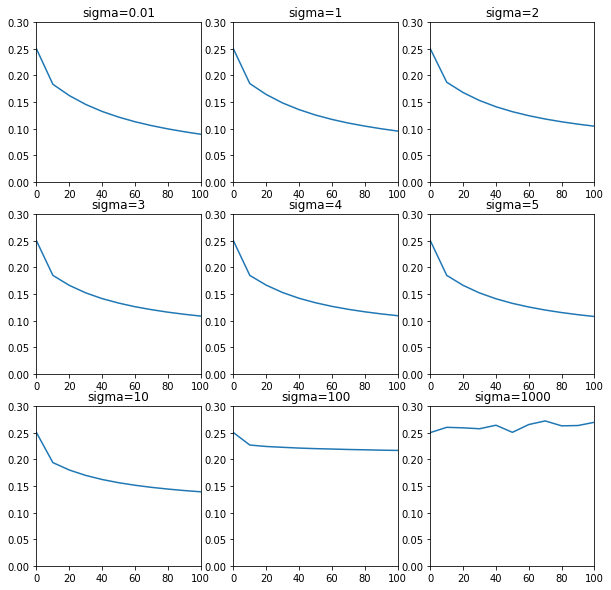

In [370]:


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')

historys = []
sigmaset = [0.01, 1, 2, 3, 4, 5, 10, 100, 1000]

for i, sigma in enumerate(sigmaset):
  x, y = gen_n_data(sigma, 300)
  
  net = NeuralNetwork()
  w, b, h = net.train(x, y, epochs=100, lr=0.01, batchsize=16)
  historys.append(h)

  w1, w2 = w[0], w[1]
  f = lambda x: (- b - w1 * x) / w2

  plt.subplot('33' + str(i + 1))
  plt.xlim(-10, 10)
  plt.ylim(-10, 10)
  plt.title("sigma={}".format(sigma))
  
  plt.plot(range(-10, 11), f(range(-10, 11)), 'g', label='Hyperplane')
  plt.legend(labels=["y = {:.2f}x + {:.2f}".format(-1 * w1 / w2, -1 * b / w2)], loc=0)

  plt.scatter(x[:num][:, 0], x[:num][:, 1], c='b', marker='.')
  plt.scatter(x[num:][:, 0], x[num:][:, 1], c='r', marker='.')

plt.savefig('scatter.svg')
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')

for i, h in enumerate(historys):

  plt.subplot('33' + str(i + 1))
  plt.xlim(0, 100)
  plt.ylim(0, 0.3)
  plt.title("sigma={}".format(sigmaset[i]))
  plt.plot(range(0, 110, 10), h)

plt.savefig('cur.svg')
plt.show()

  
    
    